
# <center>Advertising Sales Model
<center> Author: Jeremy Kight
<center> Date: 01/23/2020

***

# Abstract

In this project, a linear regression model was created with the intent on predicting the amount of profit a company could expect to obtain based on the monetary amount spent on various forms of advertisments. Through statiscal testing, it was determined that out of tv, radio, and newspaper advertising, only tv and radio advertisment data should be used in predicting sales. The final regression model was determined to be in the form of $Sales = 2.947 + (0.047 \times TV) + (0.180 \times Radio)$, where Sales is the amount of profit made, TV is the budget allocated to tv advertisments, and Radio is the budget allocated to radio advertisments. Within the scope of the data given, the completed machine learning model was able to perfom with a root mean squared value (RMSE) of 1.398 and a R<sup>2</sup> value of 0.886. In this case, the model is considered satisfactory since it would provide a company with a good estimate of how much money they are expected to gain from advertising. Of course with more data, a more accurate model could be derived. To have to greatest impact, the new data would need to be focused on tv and radio advertisment budgets. However, more data should be gathered on newspaper advertisment budgets to ensure that it is not statistically significant.  


# Introduction

For many companies, advertising is an instrumental aspect of their business model. A company chooses a marketing strategy, with the goal of reaching as many people that are most likely to buy their products. For decades, advertising mediums included newspapers, radios, and tvs. However, with the explosion of the internet and social media, companies now look at advertising through other companies. For example, a company may choose to pay Facebook so that their ads will appear on potential costumers timelines. Since advertisments cost companies money, companies need to be able to determine whether their advertising strategies are successful. This report will look at how a company can use machine learning to determine the sales from tv, radio, and newspaper advertisments. 

# Procedure

In order to carry out this project, it is recommened to download Anaconda. Anaconda provides all the tools, libraries, and packages needed for this project. If needed, click [here]("https://www.anaconda.com/") to be taken to Anaconda's website to download the required material. The programming language that will be used to build this particular machine learning algorithm will be Python. The Python code will be written in Jupyter, which can be found [here](https://github.com/jekight/Advertising_Sales) in my github repository called "Advertising Sales". In this repository, the dataset used in this project can also be found. Once the setup is complete and the dataset is saved in the working directory, the following steps can be taken to build a machine learning model to determine sales from advertisments.

Step 1) Import the dataset as a dataframe

Step 2) View the dataset to understand the contents

Step 3) View the statistical information of the dataset

Step 4) Create data visualizations

Step 5) Create feature and target groups

Step 6) Split the dataset into training and testing groups

Step 7) Build machine learning models

Step 8) Evaluate the various models

Step 9) Make predictions using the test dataset

Step 10) Evaluate the performance of the model

Step 11) Save the working model

***

## Setup

The first step involves using the libary "pandas" to load in the dataset, in order to analyze the data. Thus, the pandas library is the first library that needs to be imported. However, before importing the dataset in, the possibility of the dataset containing missing values needs to be accounted for. Since Pandas will not recognize all the various ways missing data may be presented, a list can be created to tell Pandas what to look for. Thus, a variable named "missing_values" is created and will contain various ways missing data points may be presented. Then a new variable will be created to store the imported dataset.

In [1]:
#Import the advertising dataset
import pandas as pd
missing_values = ["NA","N/A","n/a", "na", "--", " "]
dataset = pd.read_csv('Advertising.csv', na_values = missing_values, index_col=0)

## Exploring The Dataset

Next, the dataset will be explored in order to understand the contents. First, the shape of the dataset will be revealed, followed by finding out what all the column names are. While the first few steps are completely optional, but they will provide a better understanding of the size of the dataset and what features might be important for model building. Then, it is a good idea to view a small sample of the dataset by using the head( ) function. 

In [2]:
# View the shape of the dataset
dataset.shape

(200, 4)

From the results above, it was determined that the dataset contains 200 rows and 4 columns. One reason that viewing the shape of a dataset first is important is because sometimes the datasets may be very large. Thus, viewing the entire dataset is not feasible.  


In [3]:
# View the various column names in the dataset.
dataset.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

The above output shows the column names contained in the dataset. From here, the ideas of which columns will be the features and which column will be the target can start to be pondered. Also, if there are any spelling mistakes in the dataset or column names that should be changed, now would be the time. In this case, the column names will be adjusted to make the names shorter and easier to type. 

In [4]:
dataset.rename(columns={'TV Ad Budget ($)':'TV', 'Radio Ad Budget ($)':'Radio', 'Newspaper Ad Budget ($)':'Newspaper',
       'Sales ($)':'Sales'}, inplace=True)
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

The column names were shortened to 'TV', 'Radio', 'Newspaper', and 'Sales'. This will make the codes shorter and easier to read later on when specific columns are called. Next, the head( ) function is used in order to view the first few rows of the dataset.

In [5]:
# View the initial few records of the dataset
dataset.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Up until now, the dataset has now been seen. Yet, it was already determined that the dataset only contained 4 columns with the names set earlier. As a result, the head( ) function serves as more of a confirmation that the dataset is what is already expected. Note that the actual shape of the dataset would be unknown without using the shape( ) function earlier. If it was desirable to view the entire data table then one could do so, however, this would not be a great option for large datasets.

In [6]:
# Check to see if any columns contain missing values.
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Since the entire dataset has not been viewed, it would be impossible to know if there were any missing values within the dataset. This is something that should be checked because it will impact the results of the analysis and model building. The above output shows that there are no missing values in any of the columns. So it is safe to move on. 

## Statistical Summary

Anytime an analysis is being performed, it is a good idea to view the basic statistics of the dataset. The goal of the following code is just to see what the count, mean, and quartiles are of each column. This will also be visualized later on.

In [7]:
# View the statistical summary of the dataset
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Visualization

Using plots to display statisical information is a great way to understand the data. It allows for easy and accurate comparisions. In order to create plots, the library matplotlib will be utilized. Before creating plots, it is recommended to set the figure parameters for better viewing.

In [8]:
# Set the figure size for better viewing
from matplotlib import pyplot
pyplot.rcParams['figure.figsize']=(20,7)

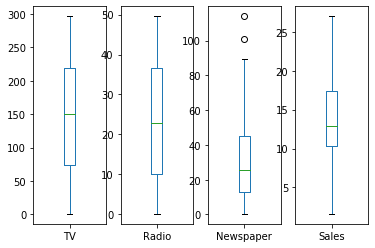

In [9]:
# View Univariate plots by creating box and whisker plots for each feature (column)
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
pyplot.show()

One of the most important aspects of the box and whisker plot, is that is allows for identifying any outliers. In the plots above, it can be seen that there are two outliers within the newspaper column. Depending on the dataset at hand, dealing with outliers may be necessary and vital for good analysis. In this case, the outliers will not be removed as it is difficult to determine, by the data provided, whether or not they are significant. This is a smaller dataset, thus with more data, it may be revealed that those two data points are not outliers. Also, note that the box plots do not share the same x and y axis. This is to provide better viewing for the reader.

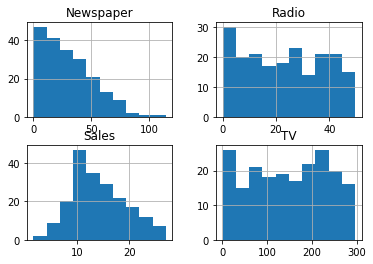

In [10]:
# Create a histogram for each feature
dataset.hist()
pyplot.show()

Histograms are great because they show the distribution of the data for each variable. Above, it can be seen that the newspaper budget is skewed right, which means that most of the data is represented by lower values. The radio and tv budgets are pretty evenly distributed. While the sales data is closer to being normally distributed (still slightly skewed right). Another type of plot that will show important information is scatterplots, as seen below.

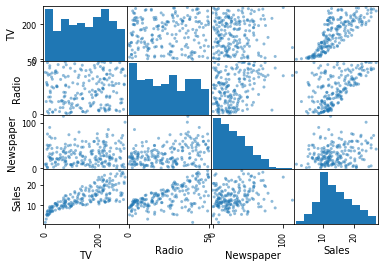

In [11]:
# Create a multivariate plot to see interaction between variables
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
pyplot.show()

Since the 'Sales' column (the target variable) is numeric, then some sort of regression model will be needed for making predictions. When dealing with regression models, the relationship between the independent and dependent variables should be examined. Above, it can be seen that some plots ('TV vs Sales' and 'Radio vs Sales') show a linear relationship between the independent and dependent variables. This means that a linear regression model would be a good choice to apply. It should be noted that the plot showing 'Newspaper vs Sales' does not display a linear correlation. However, this is not to rule out newspaper ads completely. Again, this is a smaller dataset. With more data, there is a possibility that a linear relationship between newspaper ads and sales exist. Lastly, upon examination, there is no correlation between the different independent variables. To get a closer look at the independent variables vs dependent variables, the code below could be used.

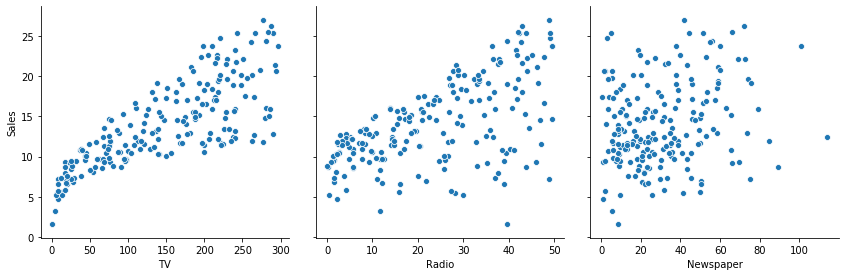

In [12]:
# visualize the relationship between the features and the response using scatterplots
import seaborn as sns
sns.pairplot(dataset, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height = 4,aspect=1)
pyplot.show()

Again, strong linear correlations are key here. Having strong correlations will allow more accurate predictive models. Above, it can be seen that 'TV' and 'Radio' have linear correlations, while 'Newspaper' is more random. A line of best fit can be applied to the scatterplots above, as seen below.

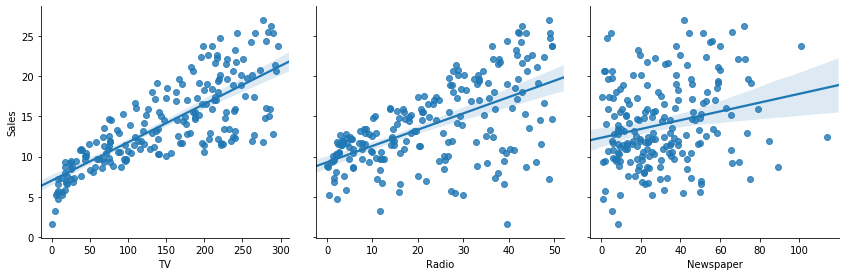

In [13]:
sns.pairplot(dataset, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
pyplot.show()

## Model Preparation

In this section, the dataset will be reconfigured in order to train and test the data in various models. The first step that will be taken, is to create a subset of the data which contains all of important variables that will be included in the machine learning model. The first feature group will contain the variables 'TV', 'Radio', and 'Newspaper'. Including all three variables first will reveal which variables are statistically significant for predicting sales.

In [14]:
# Create a feature group. This will be important variables you want the model to consider.
feature1 = dataset[['TV','Radio','Newspaper']]

Notice above that each desired featured column was stated explicitly. This is only one way to create a feature group. Another popular option is to use a slicing technique. One benefit of using slicing is that more columns can be included on shorter code. In the above case, each column was listed out separately to visually show which columns were going to be included. 

In [15]:
#View the feature object
feature1.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


Again, it is a good idea to make sure that the new dataframe was create correctly. Using the head( ) function allows for a quick viewing of the dataset. Also, if a slicing technique was used in the previous step, then using the head( ) function would show all the columns included in the new dataframe.

In [16]:
#Verify if all the observations have been captured in the feature object
feature1.shape

(200, 3)

Just to make sure that all the data points transferred over to the new dataframe, the shape feature was used. The result shows that the features dataframe contains 200 observations and 3 variables, which is what is expected.

Next, a target dataframe will be created. This new dataframe will contain all of the sales data from the original dataset. All of the previous steps used will be repeated below to ensure that the target dataframe is set up correctly.

In [17]:
#Create a target object (Hint: use the sales column as it is the response of the dataset)
target = dataset[['Sales']]
target.head()

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [18]:
#Verify if all the observations have been captured in the target object
target.shape

(200, 1)

Now it is time to split the data into a training and testing group. The models will be trained and evaluated with the training data. Then once a model is decided on, the chosen model will use the testing data to make predictions and will then be evaluated on those predictions. It is recommended to split the data in either a 80-20 split or a 75-25 split, depending on the size of the data. For this project, the data will be split 80 percent for training and 20 percent for testing the data. This decision was made based on the size of the data provided. Since this is a small dataset, a higher percentage will be alloted to training in order to produce a more reflective model.

In [19]:
from sklearn.model_selection import train_test_split
#Split the dataset (by default, 75% is the training data and 25% is the testing data)
x_train, x_test, y_train, y_test = train_test_split(feature1, target, test_size=0.20, random_state=1)

After splitting the data, make sure that the datasets were split correctly by using the shape( ) function. 

In [20]:
#Verify if the training and testing datasets are split correctly (Hint: use the shape() method)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(160, 3)
(160, 1)
(40, 3)
(40, 1)


Above, it can be seen that all the datasets were appropriately split according to the specified percentages. However, there is one small detail to notice. In order for the models to work properly, the y_train dataset needs to be converted from (150,1) to (150, ). This can be easily accomplished using ravel( ). 

In [21]:
# Use ravel to convert y_train from (n,1) to (n, )
import numpy as np
y_train = y_train.values.ravel()

In [22]:
print (y_train.shape)

(160,)


Now, all of the data is prepared and ready for model training, evaluation, and testing.

## Model Building

There are several factors to consider when trying to determine which type of model to create. Now since the target variable (sales budget) is a numeric type, some type of regression line needs to be implemented. By viewing the graphs earlier, it was noted that some of the independent variables showed a linear relationship when plotted against the sales budget data. Linear relationships indicate that a linear regression model might be the best fit for the data. Thus, a linear regression model will be created and tested.

First, the model will be created using sklearn. The linear model will then be trained with the training dataset created earlier by using k-fold cross validation. In this case, the training dataset is shuffled, split into 10 parts, trained with 9 of the parts, and tested with 1 part. Once the model is tested, the scores are recorded and the process starts over. Each data point is assigned one group and is given the opportunity to be in the hold out group (test group) one time and in the training group 9 times. Upon completion of this project, the R<sup>2</sup> metric will be returned to show how well the model fits the data.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

LR1 = LinearRegression()
kfold = model_selection.KFold(n_splits=10, random_state=314)
cv_results = cross_val_score(LR1, x_train, y_train, cv=kfold, scoring='r2')
print('%s: %.3f (%.3f)' % ('LR1', cv_results.mean(), cv_results.std()))

LR1: 0.884 (0.053)


The R<sup>2</sup> value of the model is 0.884 with a standard deviation of 0.053. While this result is not necessarily bad, there is still much more to tell from the data. But before analyzing this model any further, there should be an understanding of what this model is and what it looks like. Going back to middle school/high school math, the first equation most people learn to plot is the equation of a straight line: 

<br>
\[y = mx + b\]
<br>

where y is the dependent variable, m is the slope, x is the independent variable, and b is the y-intercept. The above equation works great if there is one input variable and one output variable. However, when dealing with multiple input variables and one output variable, a slightly different equation needs to be implemented, as shown below: 

<br>
\[y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dotsb + \beta_nx_n\]
<br>
    
where y is the predicted value, $\beta_0$ is the y-intercept, $(\beta_1,\beta_2,\dotsc,\beta_n)$ are the regression coefficients, and $x_1,x_2,\dotsc,x_n$ are the independent variables. In order to derive an equation for the regression model created earlier, the regression coefficients need to be found. Luckily this can be revealed easily by just printing the coefficients results.

In [24]:
#Print the intercept and coefficients 
LR1.fit(x_train,y_train)
print('The y-intercept of the linear regression model is',LR1.intercept_)
print('The TV coefficient is',LR1.coef_[0])
print('The Radio coefficient is',LR1.coef_[1])
print('The Newspaper coefficient is',LR1.coef_[2])

The y-intercept of the linear regression model is 2.9079470208164295
The TV coefficient is 0.04684310317699042
The Radio coefficient is 0.17854434380887624
The Newspaper coefficient is 0.0025861860939889944




Based on the variables supplied for the model, it was found that the regression coefficients for 'TV', 'Radio', and 'Newspaper' were 0.047, 0.179, and 0.003, respectively. By applying the results to the equation for a multi variable regression line, the following equation can be formulated:

<br>
\[sales = 2.908 + (0.047 \times TV) + (0.179 \times Radio) + (0.003 \times Newspaper)\]
<br>

So for example, if the first row of data points from the original dataframe were inputed into the equation above manually, then the sales amount should come out to about 22.1. 

<br>
\[sales = 2.908 + (0.047 \times 230.1) + (0.179 \times 37.8) + (0.003 \times 69.2)\]
<br>

<br>
\[sales = 20.6965\]
<br>

This can be checked by typing in the equation into python, as shown below.

In [25]:
print(2.908+(0.047*230.1)+(0.179*37.8)+(0.003*69.2))

20.6965


Now, check to see if this matches what the model predicts. Again, the first row of data points will be used. 

In [26]:
example = [[230.1, 37.8, 69.2]]
LR1.predict(example)

array([20.61448534])

The results are fairly close. The difference can be attributed to rounding of the regression coefficients. Note that the correct sales value would have been 22.1, meaning that the working model is not perfect and could potentially be improved. The rest of the testing dataset will be predicted based on the values contained in the x_test group. 

In [27]:
#Predict the outcome for the testing dataset
y_pred = LR1.predict(x_test)
y_pred

array([21.73577184, 16.45693776,  7.65993185, 17.89202679, 18.67730671,
       23.86271904, 16.33623628, 13.45649226,  9.177296  , 17.36056228,
       14.4677995 ,  9.85697601, 17.26057027, 16.71866935, 15.09530285,
       15.58923732, 12.45188167, 17.27925151, 11.0944114 , 18.06889853,
        9.33433055, 12.91345761,  8.7842804 , 10.46670654, 11.40303174,
       15.03104665,  9.78479388, 19.46028647, 18.22954934, 17.1958903 ,
       21.60304218, 14.71901407, 16.29205532, 12.36432281, 19.98831261,
       15.37556411, 13.96678297, 10.06809496, 20.97197274,  7.45877832])

To score how well the linear regression model was able to predict the actual sales data based on the input of the independent variables, the square root mean error will be utilized. The square root mean error is a metric that evaluates a model's accuracy in its predictions. Essentially, this metric will reveal how concentrated the data is around the line of best fit.

In [28]:
import numpy as np
from sklearn import metrics

#Calculate the RMSE
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4113417558581578


As can be seen above, the RMSE value is about 1.411. When it comes to the RMSE value, the lower the value the better. Although it will not be achieved in a real world dataset, a RMSE value of 0 would indicate a perfect fit. A RMSE value of 1.411 could be acceptable but first, more statistical evaluations should be examined.

In [29]:
import statsmodels.formula.api as smf

### STATSMODELS ###

# create a fitted model with all three features
SM1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=dataset).fit()

# print the coefficients
SM1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

First, notice that the coefficients are different. This is okay because in this case, the point of interest is in the statistical summary of the model. More specifically, the p-test is the statistic of interest. It will identify any relevant or nonrelevant variables. From the graphs created earlier, it was seen that the 'Newspaper' variable did not show a correlation when plotted against 'Sales'. Thus, it may not be a good variable to use in the linear regression model. Below, statsmodel is used to display several statiscal measures, including the p-test.

In [30]:
### STATSMODELS ###

# print a summary of the fitted model
SM1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        14:37:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the p-test results, the newspaper variable is revealed to be much greater that 0.05. This means that the newspaper variable  has a coefficient that is too close to zero and is not contributing much to the regression model. To see if the model would be perform better without the 'Newspaper' variable as a feature, a new model is created in order to compare the models' performance.

In [31]:
feature2 = dataset[['TV', 'Radio']]
target2 = dataset[['Sales']]
x_train2, x_test2, y_train2, y_test2 = train_test_split(feature2, target, test_size=0.20, random_state=1)
y_train2 = y_train2.values.ravel()
LR2 = LinearRegression()
kfold2 = model_selection.KFold(n_splits=10, random_state=314)
cv_results2 = cross_val_score(LR2, x_train2, y_train2, cv=kfold2, scoring='r2')
print('%s: %.3f (%.3f)' % ('LR2', cv_results2.mean(), cv_results2.std()))

LR2: 0.886 (0.053)


After removing the 'Newspaper' variable from the features list, the R<sup>2</sup> value increased slightly (by 0.002) and the standard deviation stayed the same. A large change was not expected since the 'Newspaper' variable was not contributing much. Overall, this R<sup>2</sup> value indicates that the line of best fit is reasonable at fitting the data.

In [32]:
#Print the intercept and coefficients 
LR2.fit(x_train2,y_train2)
print('The y-intercept of the linear regression model is',LR2.intercept_)
print('The TV coefficient is',LR2.coef_[0])
print('The Radio coefficient is',LR2.coef_[1])

The y-intercept of the linear regression model is 2.9475150360289994
The TV coefficient is 0.046869974980173444
The Radio coefficient is 0.18000650373005056


The y-intercept and coefficients for the independent variables, within the new model, experienced only a slight change. A direct comparison can be seen below.

|Variable|Old Coefficient|New Coefficient|
|:---:|:---:|:---:|
|y-Intercept|2.9079470|2.9475150|
|TV|0.0468431|0.0468699|
|Radio|0.1785443|0.1800065|

Once again, a significant change was not expected since the 'Newspaper' variable was not contributing much to the regression model. However, the slight change in coefficients hopefully improved the accuracy of the model. To see if the small changes improved the model, the new model's predictions will be compared to the old model's predictions.

In [33]:
y_pred2 = LR2.predict(x_test2)
y_pred2

array([21.75602835, 16.45283   ,  7.68498075, 17.89854771, 18.67725322,
       23.8001131 , 16.28958747, 13.36567675,  9.13663933, 17.29146113,
       14.41976185,  9.88105063, 17.33065475, 16.69814917, 15.00680872,
       15.48131088, 12.43241041, 17.31064343, 11.16764004, 18.13321062,
        9.38132296, 12.71353738,  8.75011855, 10.5014414 , 11.37124838,
       15.03593604,  9.77378461, 19.48694106, 18.32570002, 17.20710464,
       21.66189194, 14.55054628, 16.37218182, 12.32883551, 20.02621323,
       15.39390999, 13.98341958, 10.03852687, 21.01121113,  7.48429727])

In [34]:
compare_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Old Predictions': y_pred.flatten(),
                           'New Predictions':y_pred2.flatten()})
compare_df

,Actual,Old Predictions,New Predictions
0,23.8,21.735772,21.756028
1,16.6,16.456938,16.452830
2,9.5,7.659932,7.684981
3,14.8,17.892027,17.898548
4,17.6,18.677307,18.677253
5,25.5,23.862719,23.800113
6,16.9,16.336236,16.289587
7,12.9,13.456492,13.365677
8,10.5,9.177296,9.136639
9,17.1,17.360562,17.291461


From the results seen above, the models predicted very similar values. To see if the new model has an overall more accurate approach, the RMSE can be calculated.

In [35]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

1.3982924890777741


The new model has a RMSE value of about 1.398, which is lower than the first model's. A comparison of the RMSE value from each model can be viewed below.

|Model|RMSE Value|
|:---:|:---:|
|Old|1.4113417|
|New|1.3982924|



A reduced RMSE value shows that the second model does a better job predicting the sales values. Thus, taking the 'Newspaper' variable out of the regression model was the correct choice. To compare the two models visually, a scatterplot can be created, as shown below.

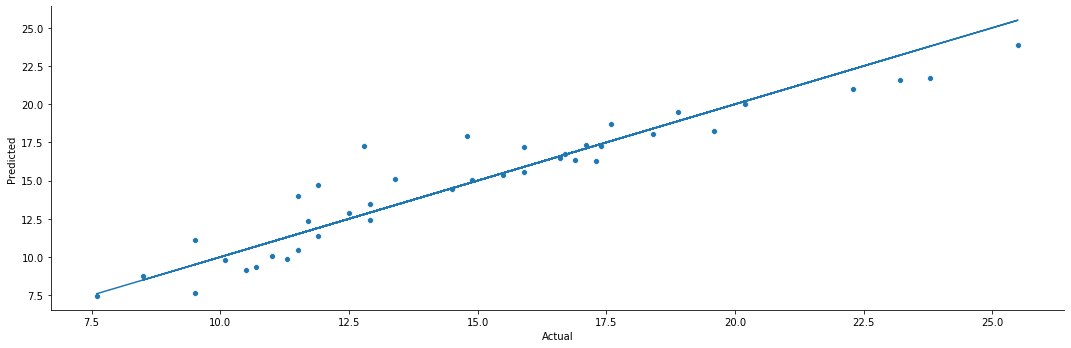

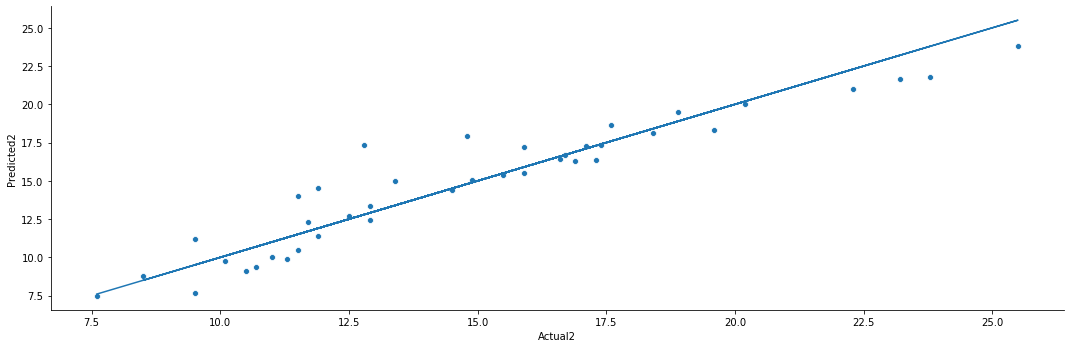

In [36]:
import matplotlib.pyplot as plt

y_test = y_test.values.ravel()
y_test
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

y_test2 = y_test2.values.ravel()
y_test2
df2 = pd.DataFrame({'Actual2': y_test2.flatten(), 'Predicted2': y_pred2.flatten()})

sns.pairplot(x_vars=['Actual'], y_vars='Predicted', data = df, height=5, aspect=3)
plt.plot(y_test, y_test + 0, linestyle='solid')
sns.pairplot(x_vars=['Actual2'], y_vars='Predicted2', data = df2, height=5, aspect=3)
plt.plot(y_test2, y_test2 + 0, linestyle='solid')
plt.show()

The two plots above show how well the model did at predicting the correct sales values. The closer the data point is to the line, the better the prediction. Data points that fall on the line are values that were predicted exactly. By inspecting the plots, it can be seen that the model was less precise when the sales values were between 12.0 and 16.0. More specifically, the model is more prone to over estimate the sales too much. 

## Save Finished Model

To save the chosen model, pickle will be used. This way anytime the model needs to be used, this entire notebook does not need to be run. 

In [37]:
# Import library to save working model
import pickle

# Save the model
filename = 'advertisment_model.sav'
pickle.dump(LR2, open(filename, 'wb'))

Now, anytime the linear regression model created in this notebook needs to be utilized, the below code can be ran.

In [38]:
# To re open model 
loaded_model = pickle.load(open(filename, 'rb'))
prediction = loaded_model.predict(x_test2)
prediction

array([21.75602835, 16.45283   ,  7.68498075, 17.89854771, 18.67725322,
       23.8001131 , 16.28958747, 13.36567675,  9.13663933, 17.29146113,
       14.41976185,  9.88105063, 17.33065475, 16.69814917, 15.00680872,
       15.48131088, 12.43241041, 17.31064343, 11.16764004, 18.13321062,
        9.38132296, 12.71353738,  8.75011855, 10.5014414 , 11.37124838,
       15.03593604,  9.77378461, 19.48694106, 18.32570002, 17.20710464,
       21.66189194, 14.55054628, 16.37218182, 12.32883551, 20.02621323,
       15.39390999, 13.98341958, 10.03852687, 21.01121113,  7.48429727])

# Results

The finished linear regression model created to predict the amount of profit a company can expect based on their budgets for advertising was found to be $Sales = 2.947 + (0.047 \times TV) + (0.180 \times Radio)$, where Sales is the amount of profit made, TV is the budget allocated to tv advertisments, and Radio is the budget allocated to radio advertisments. During the process for creating this model, it was found that the newspaper budget data had no significant statistical impact on predicting the sales profit. Overall, this model had a root mean squared value of 1.398 and a R<sup>2</sup> value of 0.886. This means that the model created is a good fit for the data provided. In order to improve this model, more data will be required to better understand the relationships between the variables. If this was a real company and their data, it would be recommended for the company to increase the budgets for tv and radio advertisments. 